In [1]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [2]:
def linear_function(x, a, b):
    return a*x + b

def quadratic_function(x, a, b, c):
    return a*(x ** 2) + b * x + c

def exponential_function(x, a, beta):
    return beta * np.exp(a*x)

def solve_SLAU(x, y):
    sum_x_i_1 = sum([x_i for x_i in x]) # 0,1 1,0
    sum_x_i_2 = sum([x_i ** 2 for x_i in x]) # 0,0
    sum_y_i_1 = sum([y_i for y_i in y]) # another 0,1
    sum_x_i_y_i = 0 # another 0,0
    n = len(x) # 1,1
    for i in range(len(x)):
        sum_x_i_y_i += x[i] * y[i]
    M1 = np.array([[float(sum_x_i_2), float(sum_x_i_1)], [float(sum_x_i_1), float(n)]])
    v1 = np.array([float(sum_x_i_y_i), float(sum_y_i_1)])
    solved = np.linalg.solve(M1, v1)
    
    return solved[0], solved[1]

def solve_3_SLAU(x, y):
    sum_x_i_1 = sum([x_i for x_i in x]) # 0,1 1,0
    sum_x_i_2 = sum([x_i ** 2 for x_i in x]) # 0,0
    sum_x_i_3 = sum([x_i ** 3 for x_i in x])
    sum_x_i_4 = sum([x_i ** 3 for x_i in x])
    
    n = len(x) # 1,1
    
    sum_y_i_1 = sum([y_i for y_i in y]) # another 0,1
    
    sum_x_i_1_y_i = 0 # another 0,0
    sum_x_i_2_y_i = 0

    for i in range(n):
        sum_x_i_1_y_i += x[i] * y[i]
        sum_x_i_2_y_i += (x[i] ** 2) * y[i]

    M1 = np.array(
        [
            [sum_x_i_4, sum_x_i_3, sum_x_i_2],
            [sum_x_i_3, sum_x_i_2, sum_x_i_1],
            [sum_x_i_2, sum_x_i_1, n]
        ]
    )
    V1 = np.array(
        [
            sum_x_i_2_y_i,
            sum_x_i_1_y_i,
            sum_y_i_1
        ]
    )
    solved = np.linalg.solve(M1, V1)
    return solved[0], solved[1], solved[2]
    


In [3]:
x = [3., 5., 7., 9., 11., 13.]
y = [3.5, 4.4, 5.7, 6.1, 6.5, 7.3]
n = len(x)
assert len(x) == len(y)

## Линейная функция
Ошибка = 0.3727

In [4]:
a, b = solve_SLAU(x, y)

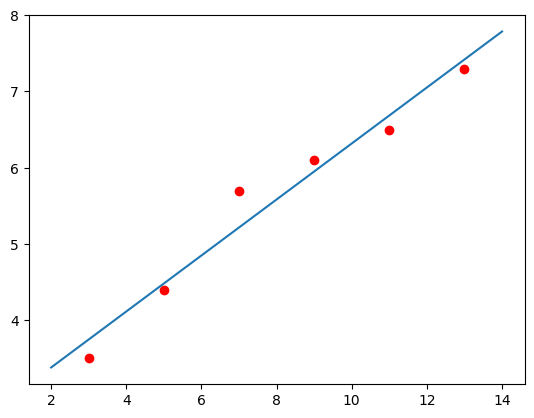

In [5]:
x_linear = np.linspace(x[0] - 1, x[n-1] + 1, 100)
y_linear = linear_function(x_linear, a, b)
plt.plot(x_linear, y_linear)
plt.scatter(x, y, color='red')
plt.show()

In [6]:
err = 0
for i in range(n):
    err += ((a*x[i] + b) - y[i])**2
print(err)

0.37276190476190496


## Наиболее подходящая функция - Степенная
ошибка = 0.1798

In [7]:
x_log = [np.log(x_i_log) for x_i_log in x]
y_log = [np.log(y_i_log) for y_i_log in y]
a_log, b_log = solve_SLAU(x_log, y_log)
beta = np.exp(b_log)

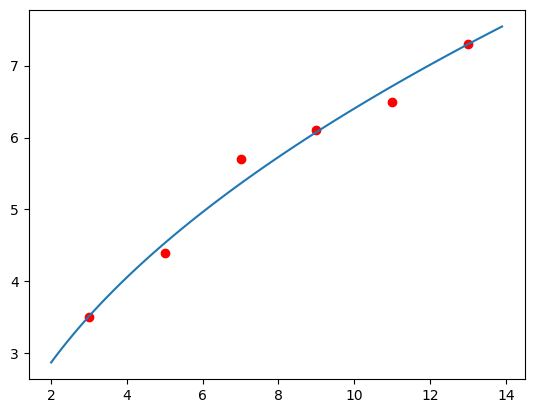

In [8]:
x_step = np.arange(x[0] - 1, x[n-1] + 1, 0.1)
y_step = beta * (x_step ** a_log)
plt.plot(x_step, y_step)
plt.scatter(x, y, color='red')
plt.show()

In [9]:
err = 0
for i in range(n):
    err += ((beta * (x[i] ** a_log)) - y[i])**2
err

0.17981055953262404

## Экспоненциальная функция
ошибка = 0.7965

In [10]:
a, b = solve_SLAU(x, y_log)
beta = np.exp(b)

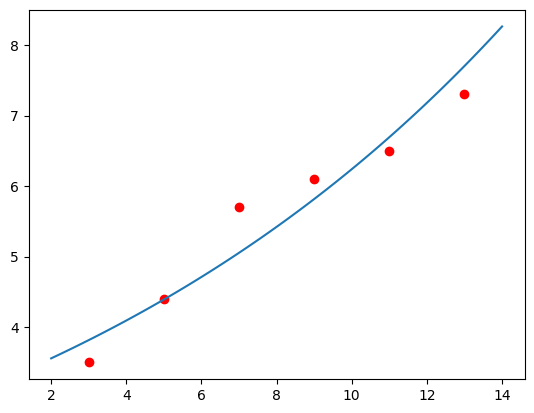

In [11]:
x_exp = np.linspace(x[0] - 1, x[n-1] + 1, 100)
y_exp = exponential_function(x_exp, a, beta)
plt.plot(x_exp, y_exp)
plt.scatter(x, y, color='red')
plt.show()


In [12]:
err = 0
for i in range(n):
    err += (beta * np.exp(a * x[i]) - y[i]) ** 2
err

0.7965499068639473

## квадратичная функция 
ошибка = 0.3778

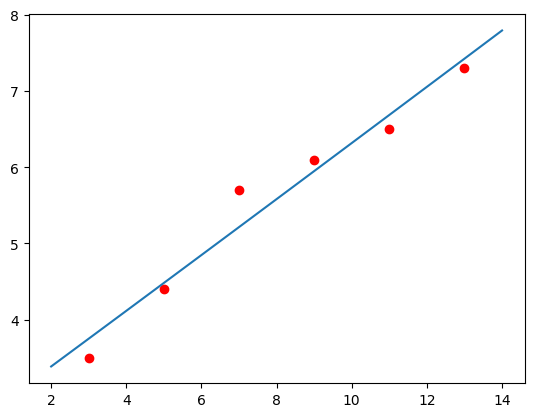

In [13]:
a, b, c = solve_3_SLAU(x, y)
x_quadro = np.linspace(x[0] - 1, x[n-1] + 1, 100)
y_quadro = quadratic_function(x_quadro, a, b, c)
plt.plot(x_quadro, y_quadro)
plt.scatter(x, y, color='red')
plt.show()

In [14]:
err = 0
for i in range(n):
    err += (a * (x[i] ** 2) + b * x[i] + c - y[i]) ** 2
err

0.3778245050715891

## Все графики

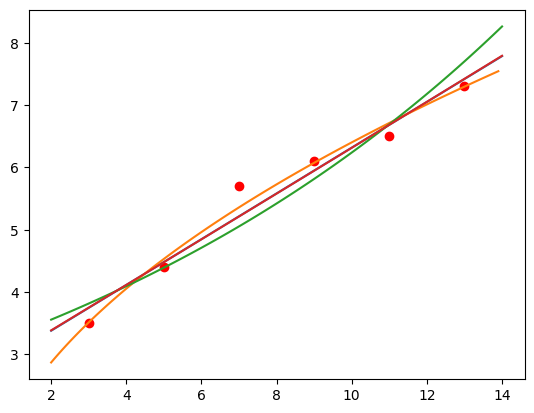

In [15]:
plt.plot(x_linear, y_linear)
plt.plot(x_step, y_step)
plt.plot(x_exp, y_exp)
plt.plot(x_quadro, y_quadro)
plt.scatter(x, y, color='red')
plt.show()